In [3]:
# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature


import os
import sys
import json
from zipfile import ZipFile
import time
import base64
from IPython.core.display import HTML

import requests
import warnings
warnings.filterwarnings('ignore')

import requests
import tqdm
from hda import Client, Configuration

In [4]:
dataset_id = "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS"

In [5]:
{
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "itemsPerPage": 200,
  "startIndex": 0
}

{'dataset_id': 'EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS',
 'itemsPerPage': 200,
 'startIndex': 0}

In [6]:
data = {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "product_type": [
    "monthly_averaged_reanalysis"
  ],
  "variable": [
    "Snowfall"
  ],
  "year": [
    "1979",
    "1980",
    "1981",
    "1982",
    "1983",
    "1984",
    "1985",
    "1986",
    "1987",
    "1988",
    "1989",
    "1990",
    "1991",
    "1992",
    "1993",
    "1994",
    "1995",
    "1996",
    "1997",
    "1998",
    "1999",
    "2000",
    "2001",
    "2002",
    "2003",
    "2004",
    "2005",
    "2006",
    "2007",
    "2008",
    "2009",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
    "2019",
    "2020",
    "2021",
    "2022",
    "2023",
    "2024"
      ],
  
  "month": [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10", 
    "11",
    "12"],
  "time": [
    "00:00",
    "06:00",
    "12:00",
    "18:00"
  ],
  "bbox": [
    -180,
    90,
    180,
    60
  ],
  "format": "netcdf",
  "itemsPerPage": 200,
  "startIndex": 0
}

In [8]:
conf = Configuration(user = "zcasty", password = "green1234Zaria")
#hda_client = Client(config = conf)
#c = Client(debug=True)
c = Client(config=conf, max_workers=12)
matches = c.search(data)
print(matches)
matches.download()

SearchResults[items=1,volume=ND]


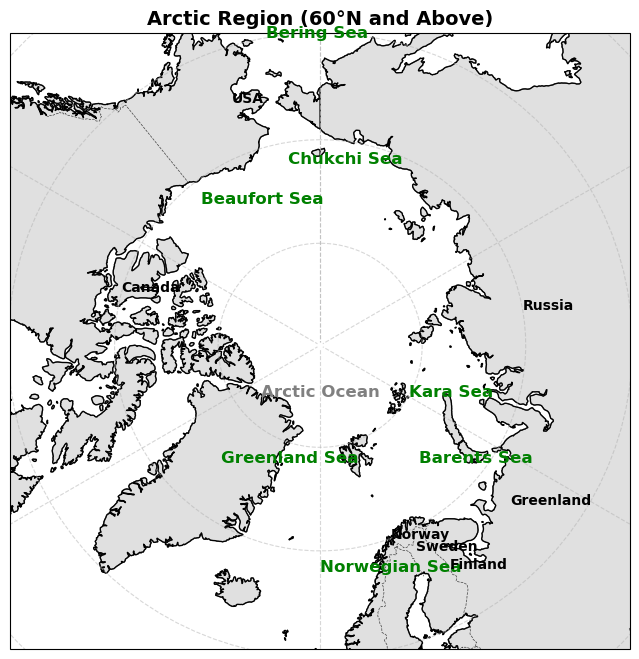

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure and axis with North Polar Stereographic projection
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.NorthPolarStereo()})

# Set extent to include everything north of 60°N
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

# Add features: land, coastlines, borders, and gridlines
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5, alpha=0.7)  # Country borders
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add labeled seas in the Arctic
sea_labels = {
    (-170, 72): "Chukchi Sea",
    (-140, 72): "Beaufort Sea",
    (40, 75): "Barents Sea",
    (0, 68): "Norwegian Sea",
    (-40, 75): "Greenland Sea",
    (60, 80): "Kara Sea",
    (-170, 60): "Bering Sea"  # Added Bering Sea
}

for (lon, lat), name in sea_labels.items():
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
            fontsize=12, fontweight='bold', color='green')

# Add country labels
country_labels = {
    (-160, 65): "USA",
    (-105, 70): "Canada",
    (100, 70): "Russia",
    (20, 70): "Norway",
    (25, 68): "Sweden",
    (30, 65): "Finland",
    (50, 66): "Greenland"
}

for (lon, lat), name in country_labels.items():
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
            fontsize=10, fontweight='bold', color='black')

# Add Arctic Ocean label
ax.text(0, 85, "Arctic Ocean", transform=ccrs.PlateCarree(),
        fontsize=12, fontweight='bold', color='gray', ha='center')

# Title
plt.title("Arctic Region (60°N and Above)", fontsize=14, fontweight='bold')

# Show the map
plt.show()

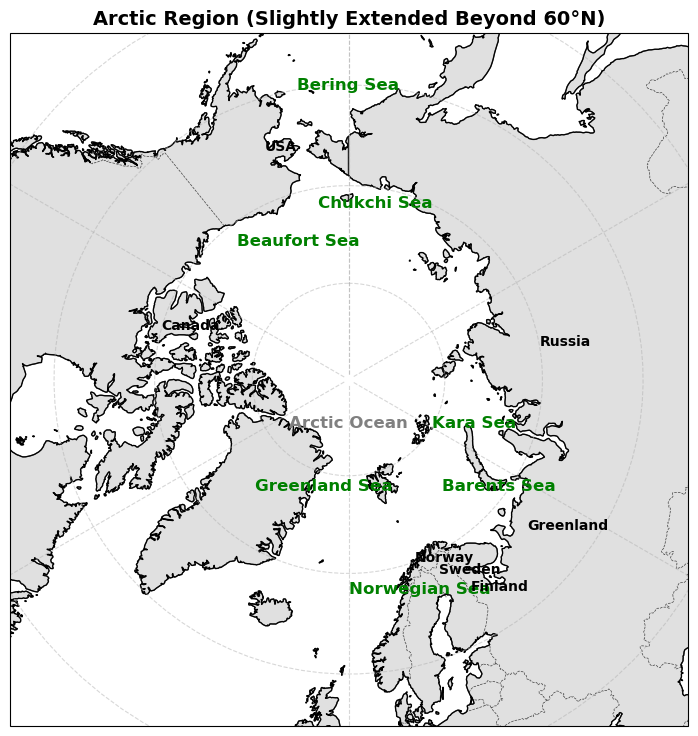

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure and axis with North Polar Stereographic projection
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': ccrs.NorthPolarStereo()})  # Slightly larger figure

# Set extent to include everything slightly beyond 60°N (adjusting for a more stretched-out view)
ax.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())  # Extended slightly below 60°N

# Add features: land, coastlines, borders, and gridlines
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5, alpha=0.7)  # Country borders
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add labeled seas in the Arctic
sea_labels = {
    (-170, 72): "Chukchi Sea",
    (-140, 72): "Beaufort Sea",
    (40, 75): "Barents Sea",
    (0, 68): "Norwegian Sea",
    (-40, 75): "Greenland Sea",
    (60, 80): "Kara Sea",
    (-170, 60): "Bering Sea"
}

for (lon, lat), name in sea_labels.items():
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
            fontsize=12, fontweight='bold', color='green')

# Add country labels
country_labels = {
    (-160, 65): "USA",
    (-105, 70): "Canada",
    (100, 70): "Russia",
    (20, 70): "Norway",
    (25, 68): "Sweden",
    (30, 65): "Finland",
    (50, 66): "Greenland"
}

for (lon, lat), name in country_labels.items():
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
            fontsize=10, fontweight='bold', color='black')

# Add Arctic Ocean label
ax.text(0, 85, "Arctic Ocean", transform=ccrs.PlateCarree(),
        fontsize=12, fontweight='bold', color='gray', ha='center')

# Title
plt.title("Arctic Region (Slightly Extended Beyond 60°N)", fontsize=14, fontweight='bold')

# Show the map
plt.show()


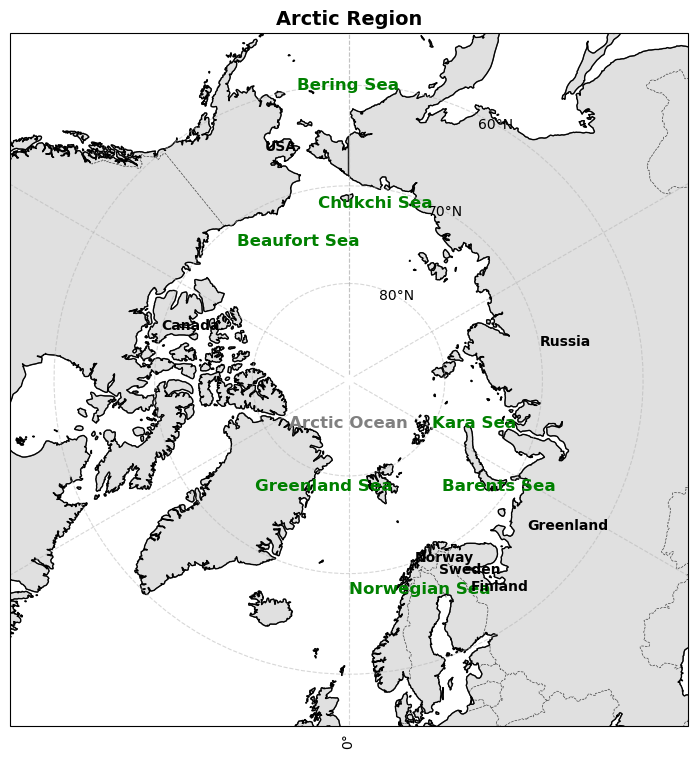

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure and axis with North Polar Stereographic projection
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': ccrs.NorthPolarStereo()})

# Set extent to slightly extend beyond 60°N for a better stretch
ax.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())

# Add features: land, coastlines, borders
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5, alpha=0.7)  # Country borders

# Add latitude (parallels) and longitude (meridians) gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
gl.top_labels = False  # Remove top labels for clarity
gl.right_labels = False  # Remove right labels for clarity
gl.xlocator = plt.FixedLocator([-180, -120, -60, 0, 60, 120, 180])  # Longitudes
gl.ylocator = plt.FixedLocator([60, 70, 80, 90])  # Latitudes
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add labeled seas in the Arctic
sea_labels = {
    (-170, 72): "Chukchi Sea",
    (-140, 72): "Beaufort Sea",
    (40, 75): "Barents Sea",
    (0, 68): "Norwegian Sea",
    (-40, 75): "Greenland Sea",
    (60, 80): "Kara Sea",
    (-170, 60): "Bering Sea"
}

for (lon, lat), name in sea_labels.items():
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
            fontsize=12, fontweight='bold', color='green')

# Add country labels
country_labels = {
    (-160, 65): "USA",
    (-105, 70): "Canada",
    (100, 70): "Russia",
    (20, 70): "Norway",
    (25, 68): "Sweden",
    (30, 65): "Finland",
    (50, 66): "Greenland"
}

for (lon, lat), name in country_labels.items():
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
            fontsize=10, fontweight='bold', color='black')

# Add Arctic Ocean label
ax.text(0, 85, "Arctic Ocean", transform=ccrs.PlateCarree(),
        fontsize=12, fontweight='bold', color='gray', ha='center')

# Title
plt.title("Arctic Region", fontsize=14, fontweight='bold')

# Show the map
plt.show()


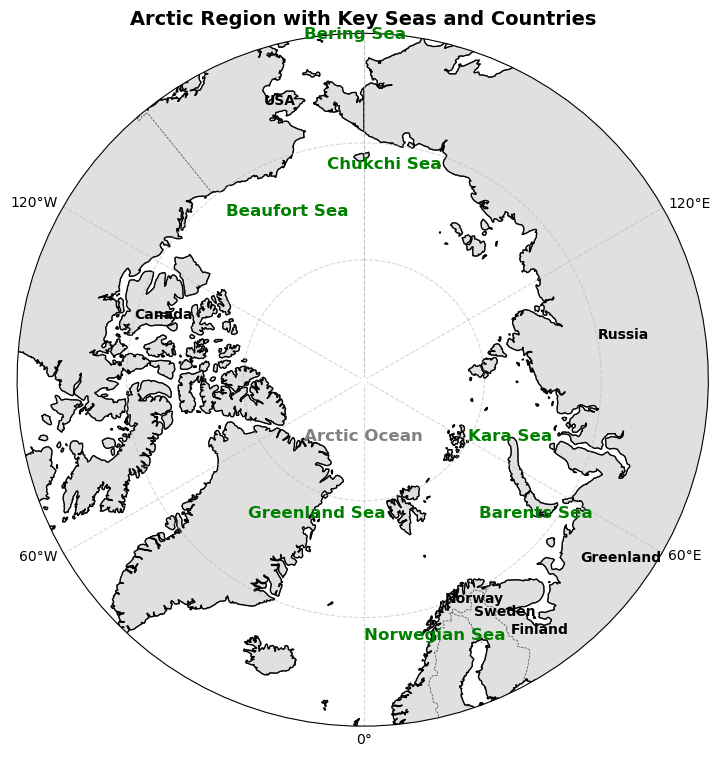

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath

# Define a function to plot the Arctic region
def plot_arctic_map(ax, title):
    # Add land and coastlines
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.7)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5, alpha=0.7)  # Country borders
    
    # Set map extent to Arctic region
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())  # Focuses from 60°N up

    # Circular boundary for the polar projection
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    # Add latitude (parallels) and longitude (meridians) gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
    gl.top_labels = False  # Remove top labels for clarity
    gl.right_labels = False  # Remove right labels for clarity
    gl.xlocator = plt.FixedLocator([-180, -120, -60, 0, 60, 120, 180])  # Longitudes
    gl.ylocator = plt.FixedLocator([60, 70, 80, 90])  # Latitudes
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    # Add labeled seas in the Arctic
    sea_labels = {
        (-170, 72): "Chukchi Sea",
        (-140, 72): "Beaufort Sea",
        (40, 75): "Barents Sea",
        (0, 68): "Norwegian Sea",
        (-40, 75): "Greenland Sea",
        (60, 80): "Kara Sea",
        (-170, 60): "Bering Sea"
    }

    for (lon, lat), name in sea_labels.items():
        ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
                fontsize=12, fontweight='bold', color='green')

    # Add country labels
    country_labels = {
        (-160, 65): "USA",
        (-105, 70): "Canada",
        (100, 70): "Russia",
        (20, 70): "Norway",
        (25, 68): "Sweden",
        (30, 65): "Finland",
        (50, 66): "Greenland"
    }

    for (lon, lat), name in country_labels.items():
        ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
                fontsize=10, fontweight='bold', color='black')

    # Add Arctic Ocean label
    ax.text(0, 85, "Arctic Ocean", transform=ccrs.PlateCarree(),
            fontsize=12, fontweight='bold', color='gray', ha='center')

    # Title
    ax.set_title(title, fontsize=14, fontweight='bold')

# Create figure and subplot with the Orthographic projection centered at the North Pole
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': ccrs.Orthographic(central_longitude=0, central_latitude=90)})

# Plot the Arctic map with labels
plot_arctic_map(ax, "Arctic Region")

# Show the map
plt.show()
